# Milestone 2 : cloud of points

In [1]:
import random                  
from fractions import Fraction
import copy

import numpy as np
import pandas as pd
from music21 import *

def play(stream):
    """Shortcut to play a stream"""
    midi.realtime.StreamPlayer(stream).play()

## Introduction 

The idea is to create a mass of little musical even comparable to a musical cloud of points. One point = one musical event.

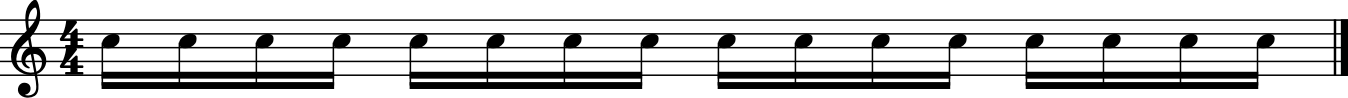

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Initialising a stream
stream1 = stream.Stream()

# Initialising one main note
UNIT = 0.25
main_note = note.Note(pitch = 'C5', quarterLength=UNIT)

# Initialising basis stream
stream1.repeatAppend(main_note, int(4/UNIT))
stream1.show()


play(stream1)

Now the idea is to randomely change the notes pitches around the main note. Changes can be microtonal changes, or changes in a tonal system. Lets start with microtonal changes.

### Microtonal cloud of point 

In [3]:
# Lower and upper variation limits
low = -500
up = 500

stream2 = copy.deepcopy(stream1)

# Detuning
for n in stream2:
    n.pitch.microtone = random.randint(low, up)

play(stream2)

Sounds ok but we do not hear one main note, altough there is one. What we can do is to change the probability rule that detunes the notes. It is more inteligent, so that we can have the feeling of a cloud of point, to use a gaussian distribution. 

We also want to hear at the very begining some note that arn't to distorded so that we can understand from the begining which note is the main (mean) note.

In [4]:
# Dispersion and mean of the variation
mean = 0
dispersion = 150
# Start of the detuning
start = 2

stream2 = copy.deepcopy(stream1)
endId = len(stream2.elements)

# Detuning
for i in range(start,endId):
    stream2.elements[i].pitch.microtone = random.gauss(mean, dispersion)

play(stream2)

We also could try with other probabilities density function, for example a triangle :

In [5]:
# Dispersion and mean of the variation
low = -500
mean = 0
up = 500

stream2 = copy.deepcopy(stream1)

# Detuning
for i in range(start,endId):
    stream2.elements[i].pitch.microtone = random.triangular(low, up, mean)

play(stream2)

It is then very easy, if we are not satisfied with those pdf to implement other probabilities laws.

### Tonale cloud of point 

The idea is now to try what cloud of point give in a definite tonal system i.e the notes are no longer randomly detuned, but randomly shifted from precise intervales. There are many way to do this : 
- Taking the europeean 12 semitones system without taking any precise scale, and shifting the note from a certain quantity of semitones
- Taking one definite scale and only choosing note from this scale
- Taking one definite scale, a chord progression in this scale, and choosing notes from the current chord of the progression
- Same as previously, but other notes are also played with lower probabilities

Let's begin with the semitones system :

In [6]:
# Dispersion and mean of the variation
mean = 0
dispersion = 3
# Start of the detuning
start = 1

stream2 = copy.deepcopy(stream1)
endId = len(stream2.elements)

# Detuning
for i in range(start,endId):
    stream2.elements[i].pitch.midi += int(random.gauss(mean, dispersion))


play(stream2)

Once again, it can be implemented with a triangular pdf :

In [7]:
# Dispersion and mean of the variation
low = -5
mean = 0
up = 5

stream2 = copy.deepcopy(stream1)

# Detuning
for i in range(start,endId):
    stream2.elements[i].pitch.midi += int(random.triangular(low, up, mean))


play(stream2)

The triangular pdf has the possibility to be not symmetric : it could be usefull to define the different lower and upper limit according to the tendanci of the melody  (if it is going up or down).

In [8]:
# from enum import Enum
# Defining types of probilitie density functions
# PDF = Enum("PDF", "TRIANGLE GAUSSIAN")

class CloudPointGenerator:
    pass
''' """Define a general cloud of point generator"""
    def __init__(self, pdf = PDF.GAUSSIAN):
        """Initialize the type of probability density function. By default : GAUSSIAN"""
        self.PDF = pdf
        
    def get_type(self):
        """Gives the type of probability density function of this object."""
        print(self.PDF.name)
        
    def change_type(self, pdf):
        """Changes the type of probability density function of this object."""
        self.PDF = pdf    '''    


' """Define a general cloud of point generator"""\n    def __init__(self, pdf = PDF.GAUSSIAN):\n        """Initialize the type of probability density function. By default : GAUSSIAN"""\n        self.PDF = pdf\n        \n    def get_type(self):\n        """Gives the type of probability density function of this object."""\n        print(self.PDF.name)\n        \n    def change_type(self, pdf):\n        """Changes the type of probability density function of this object."""\n        self.PDF = pdf    '

But actually this is not really a cloud of points since it misses one dimension : the up and down dimension.



# Another approach


One point stills represent one musciale event but we will try to bombard a region of the $xy$ plane, and then associate the $x$-axis to time, and $y$-axis to pitch.

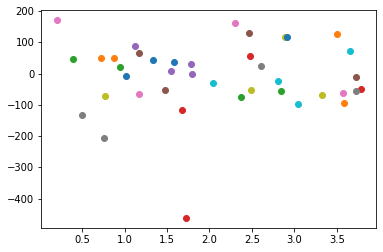

In [9]:
import matplotlib.pyplot as plt
# Defining the number of points
NUMBER_OF_POINT = 40

# We are taking here 4/4 as time signature. x_up = 4 allows to identify each integer to a beat
x_up = 4
mean = 0
dispersion = 100


def shoot(NUMBER_OF_POINT, x_up, mean, dispersion):
    """Shoots some random point onf the [0, x_up] x R domaine onf the plane."""
    points = []
    for i in range(NUMBER_OF_POINT):
        x = random.uniform(0,x_up)
        y = random.gauss(mean, dispersion)
        points.append([x, y])
    for point in points:
        plt.scatter(point[0], point[1])
    
    return points

points = shoot(NUMBER_OF_POINT, x_up, mean, dispersion)

We have to chose how to associate those beautifull point to sounds. 

For the rythm, we can pick up a small beat unit (define as a fraction of a quarter), discretize the interval $[0, x_{up}]$ and play all dot in the column were they are.

In [10]:
# RHYTHM 
UNIT = 0.25 # of a quarter

def discretize(points, UNIT):
    """Collects each values of y in slices of lenght UNIT of a quarter note."""
    # Initializing a vector of good size
    discretized_point = []
    for i in range(int(x_up/UNIT)):
        discretized_point.append([])
        
    # Distrectizing
    for point in points:
        i = 0
        while point[0] > (i+1)*UNIT:
            i += 1
        discretized_point[i].append(point[1])
    
    return discretized_point

discretized_point = discretize(points, UNIT)

One way to do this is to associate $y=0$ to a main note (as before) and define the variation in high as variations in pitches. 

### Microtonal variations

In [11]:
# PITCHES
MAIN_NOTE = note.Note(pitch = 'C5', quarterLength=UNIT)

def get_microtonal_Notes(MAIN_NOTE, discretized_point):
    m = stream.Measure()

    for event in discretized_point:
        for i in range(len(event)):
            # Transforming number into notes with variations
            variation = event[i]
            event[i] = copy.deepcopy(MAIN_NOTE)
            event[i].pitch.microtone = variation
        # adding a chord made of the ste of note of each event to the measure
        m.append(chord.Chord([x for x in event]))

    return m

m = stream.Measure()
m = get_microtonal_Notes(MAIN_NOTE, discretized_point)

play(m)

So basecally this works but sound horrible !! In such an approach, it is necessary to have at least a chromatic system.

### Chromatic system

In [12]:
def get_chromatic_Notes(MAIN_NOTE, discretized_point):
    m = stream.Measure()

    for event in discretized_point:
        for i in range(len(event)):
            # Transforming number into notes with variations
            variation = event[i]
            event[i] = copy.deepcopy(MAIN_NOTE)
            event[i].pitch.midi += int(variation)
        # adding a chord made of the ste of note of each event to the measure
        m.append(chord.Chord([x for x in event]))

    return m

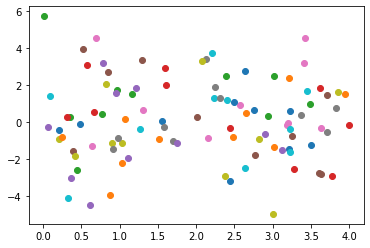

In [18]:
# Defining the number of points
NUMBER_OF_POINT = 100

# We are taking here 4/4 as time signature. x_up = 4 allows to identify each integer to a beat
x_up = 4
mean = 0
dispersion = 2

points = shoot(NUMBER_OF_POINT, x_up, mean, dispersion)

UNIT = 0.25 # of a quarter

discretized_point = discretize(points, UNIT)
    

MAIN_NOTE = note.Note(pitch = 'C5', quarterLength=UNIT)

m = stream.Measure()
m = get_chromatic_Notes(MAIN_NOTE, discretized_point)

play(m)

Still don't sound awesome enought. 

### Scaled system

For this part we got to create scales. Scales are vectors of integer, where each integer represent the number of semitones before next note.

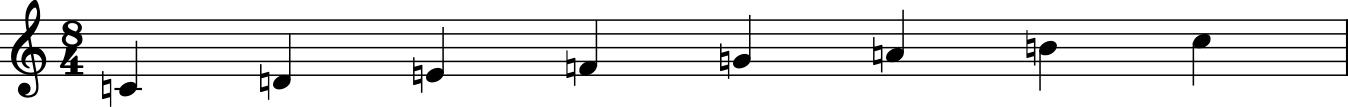

In [19]:
def select_from_chromatic(intervals, root = note.Note(pitch='C')):
    """Selects pitches from a chromatic collection based on a set of intervals"""
    return [note.Note(pitch = root.pitch.midi + x) for x in [0]+[sum(intervals[:i+1]) for i in range(len(intervals))]]

MAJOR = [2, 2, 1, 2, 2, 2, 1]
m = stream.Measure()
m.append(select_from_chromatic(MAJOR))

play(m)
m.show()

def rotate_list(l, n):
    """rotate list l by n steps"""
    return l[n:] + l[:n]

def select_mode(mode, root, scale = MAJOR):
    """select a mode based on a root"""
    return select_from_chromatic(rotate_list(scale, mode), root)

In [22]:
def get_scale_Notes(MAIN_NOTE, scale, discretized_point):
    m = stream.Measure()
    notes = select_from_chromatic(scale, MAIN_NOTE)

    for event in discretized_point:
        for i in range(len(event)):
            # Transforming number into indices
            indice = int(event[i])
            # Taking a note in the scale according to an indice
            event[i] = notes[indice % len(notes)]
            # Do an adaptation for the octaviation
            event[i].pitch.midi += (indice//len(notes))*12
        # adding a chord made of the ste of note of each event to the measure
        m.append(chord.Chord([x for x in event]))

    return m

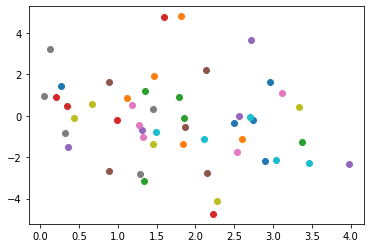

In [23]:
# Defining the number of points
NUMBER_OF_POINT = 50

# We are taking here 4/4 as time signature. x_up = 4 allows to identify each integer to a beat
x_up = 4
mean = 0
dispersion = 2

points = shoot(NUMBER_OF_POINT, x_up, mean, dispersion)

UNIT = 0.25 # of a quarter

discretized_point = discretize(points, UNIT)
    

MAIN_NOTE = note.Note(pitch = 'C5', quarterLength=UNIT)

m = stream.Measure()
m = get_scale_Notes(MAIN_NOTE, MAJOR, discretized_point)

play(m)